In [31]:
import numpy as np

# Find the following mean and standard deviations for the following distributions: 
     • A lognormal distribution, in which the associated normal 
     distribution has mu=5 and sigma=1.25. 
     • A beta distribution in which the shape parameters are alpha = 2 and beta = 5. 
     • A uniform distribution defined over the range a = 1 and b = 8. 

In [32]:
#A lognormal distribution, in which the associated normal distribution has mu=5 and sigma =1.25.

mu_n = 5 
sigma_n = 1.25 

mu_log = np.exp(mu_n + (1/2)*sigma_n**2)
sigma_log = np.sqrt((np.exp(sigma_n**2)-1)*np.exp(2*mu_n + sigma_n**2))

print("mean = ", mu_log)
print("standard deviation =", sigma_log)


mean =  324.16414244755515
standard deviation = 629.4741134647213


In [33]:
#A beta distribution in which the shape parameters are alpha = 2 and beta = 5

alpha = 2
beta = 5

mu_log2 = alpha/(alpha+beta)
sigma_log2 = np.sqrt((alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1)))

print("mean = ", mu_log2)
print("standard deviation =", sigma_log2)

mean =  0.2857142857142857
standard deviation = 0.15971914124998499


In [34]:
#A uniform distribution defined over the range a = 1 and b = 8

a= 1
b=8 

mu_log3 = (1/2)*(a+b)
sigma_log3 = np.sqrt((1/12)*(b-a)**2)

print("mean = ", mu_log3)
print("standard deviation =", sigma_log3)

mean =  4.5
standard deviation = 2.0207259421636903


# Using the data in the zip file: data.xlsx
        • Create a normal probability plot. 
        • Create a lognormal probability plot. 
        • Create an extreme value probability plot 
        • Which distribution looks to be the best fit? 

In [35]:
import pandas as pd
from scipy import stats 
from scipy import special
import matplotlib.pyplot as plt 
import math 


In [36]:
data = pd.read_csv('data.csv', header=None)
x = data[0]

#mean and standard deviation
mu = sum(x)/len(x)
std_dev = np.sqrt(sum([(i - mu)**2 for i in x])/(len(x)-1))



In [37]:
#to create the weibull plot I will need to determine the 
#shape parameter : beta (k)
#the scale parameter : lambda (lam)

k = (std_dev/mu)**-1.086
lam = (mu/special.gamma(1+1/k))


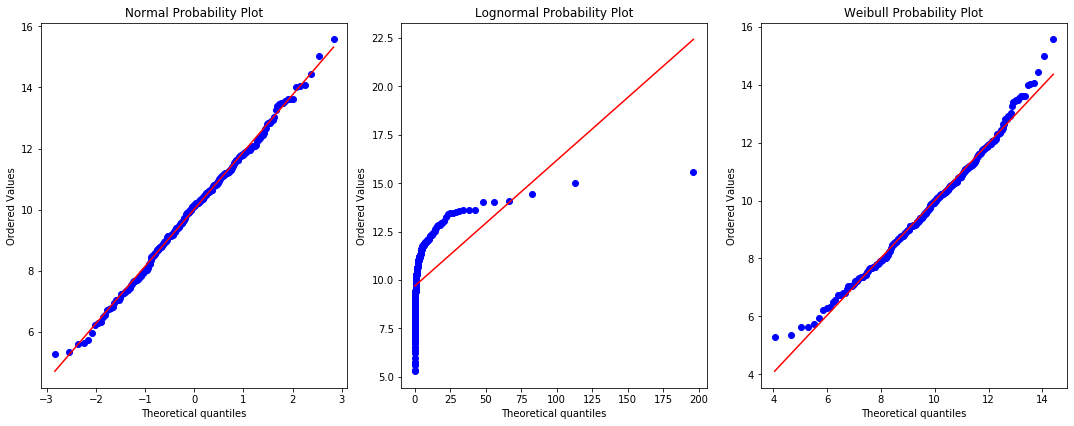

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 6]) 

#Create a normal probability plot
normal = stats.probplot(x, plot=ax1)
ax1.set_title('Normal Probability Plot')

#Create a lognormal probability plot.
lognormal = stats.probplot(x, sparams = (std_dev, 0., 1), dist='lognorm', plot=ax2) 
ax2.set_title('Lognormal Probability Plot')

#Create an extreme value probability plot 
weibull = stats.probplot(x,sparams=(k, 0 ,lam),dist='weibull_min', plot=ax3)
ax3.set_title('Weibull Probability Plot')


fig.tight_layout(pad=1.0)
plt.savefig("HW1_plots")

# The maximum daily temperature in Phoenix AZ in June is known to vary between 80°F and 110°F. The distribution of maximum daily temperature is modeled using a beta distribution with parameters alpha = 2 and  = 3.
    •What is the probability that the daily maximum temperature will exceed 100°F? 
    (hint: you will need to scale your data, and use Matlab or similar to compute the CDF) 
    • Redo the problem above (Pr{T > 100°F}), but now assume that the temperature is 
    normally distributed with a mean of 95°F and std dev of 10°F.

In [39]:
#problem metrics 

min_temp = 80 
max_temp = 110 
x_temp = 100

alpha = 2 
beta = 3 

#normalization of the data 
z = (x_temp-min_temp)/(max_temp-min_temp)


In [40]:
#finding the cdf of the beta distribution at the x_temp 

prob_temp_under_x = stats.beta.cdf(z, alpha, beta)

prob_temp_over_x = 1 - prob_temp_under_x

print("The probability that the temperature will exceed {0} degrees is {1:.2f}%". format(max_temp, prob_temp_over_x*100))

The probability that the temperature will exceed 110 degrees is 11.11%


In [41]:
#normally distributed 

temp_mean = 95 
temp_std_dev = 10 
temp_over = 100

z_part2 = (temp_over-temp_mean)/temp_std_dev

prob_temp_over = 1 - stats.norm.cdf(z_part2)

print("The probability that the temperature will exceed {0} degrees is {1:.2f}%". format(temp_over, prob_temp_over*100))

The probability that the temperature will exceed 100 degrees is 30.85%


# The maximum temperature in Phoenix AZ in June is modeled as a normal distribution with mean of 95°F and std dev of 10°F, while the maximum humidity in June is modeled as a normal distribution with mean of 21% and std dev of 5%. Temperature and Humidity are positively correlated, with a covariance of 4.  
    • What is the probability that the daily maximum temperature will be less than 99°F 
    and the humidity will be less than 23%. 
    (hint: you will need to use the Matlab function mvncdf) 
    • Redo the problem above, but now assume the two entities are uncorrelated. 

In [42]:
#normal distribution  for both temp and humdity 
#same mean and deviation as previous problem 

#humidity in %
humidity_mean = 21
humidity_std_dev = 5
cov = 4

#probability that max temp will be less than 99 & humidity less than 
temp_lessthan = 99 
humidity_lessthan = 23

correlation = cov/(humidity_std_dev*std_dev)

In [43]:
#covariance matrix = [std_dev_x^2 cov][cov std_dev_y^2]
#if we want to know what the probability is of it being above x points then we set x as the lower 
# if we want to know what the probability is of it being under x points then we set x as the upper 

from scipy.stats import mvn

#this is the lower bounds so we just want them to be unrealisticly small 
low = np.array([-1000, -1000])
#upper bounds or the points we are looking for since we want to know the probability of it being less than this
upp = np.array([temp_lessthan, humidity_lessthan])
#these are the means (in the same order!)
mu = np.array([temp_mean, humidity_mean])
#this is the covariance matirx for first part 
S_1 = np.array([[(temp_std_dev**2), cov], [cov, (humidity_std_dev**2)]])

#this is the covariance matirx for second part 
S_2 = np.array([[(temp_std_dev**2), 0], [0, (humidity_std_dev**2)]])

p,i = mvn.mvnun(low, upp, mu, S_1)

p_2,i_2 = mvn.mvnun(low, upp, mu, S_2)
print("The probability that the temperature will be less than {0} degrees and the humidity will be less than {1}% is {2:.2f}% if there is a covariance of 4". 
      format(temp_lessthan, humidity_lessthan, p*100))

print("The probability that the temperature will be less than {0} degrees and the humidity will be less than {1}% is {2:.2f}% if there is there is no correlation". 
      format(temp_lessthan, humidity_lessthan, p_2*100))

The probability that the temperature will be less than 99 degrees and the humidity will be less than 23% is 44.05% if there is a covariance of 4
The probability that the temperature will be less than 99 degrees and the humidity will be less than 23% is 42.96% if there is there is no correlation
